# Convolution and Sparsity
**Overview**
* Part 1: Orthogonal Matching Pursuit
    * Signal generation
    * Coefficient estimation with a sparsiy constraint
* Part 2: Circular convolution and its matrix form
    * Circular convolution
    * Matrix form with a circulant matrix
* Part 3: Convolutional Autoencoder
    * Transposed convolution
    * Autoencoder with convolutions and deconvolutions


# Part 1: Orthogonal Matching Pursuit


Using orthogonal matching pursuit for recovering a sparse signal from a noisy
measurement encoded with a dictionary


## Compute the main results

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

In [ ]:
n_components = 512
n_features = 100
n_nonzero_coefs = 6 #17

# generate the data
y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0,
                                   data_transposed=True)

In [ ]:
print(X.shape)
print(w.shape)
print(y.shape)

(100, 512)
(512,)
(100,)


###  Question 1: what is the relationship between y, X and w?

#### Answer:


### Question 2: what is the nature of X? Compute the variance of each column of X. How to interpret it?

#### Answer:

In [ ]:
# Code here

### Question 3: what is "idx" in the following cell?

In [ ]:
idx, = w.nonzero()

print(idx)
print(w[idx])

[123 195 226 268 269 494]
[ 0.07264699  1.58380476 -0.87322229  1.68550553 -2.73865906 -0.24061129]


#### Answer:

In [ ]:
# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

### Question 4: what is the goal of the following cell? How does it work?

#### Answer:

In [ ]:
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r1, = coef.nonzero()

In [ ]:
print(idx_r1)

[123 195 226 268 269 494]


### Question 5: what is the goal of the following cell? Compare to the previous cell.

#### Answer:

In [ ]:
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r2, = coef.nonzero()

### Question 6: what is the goal of the following cell? Compare to the previous cell.

#### Answer:

In [ ]:
omp_cv = OrthogonalMatchingPursuitCV(cv=5)
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r3, = coef.nonzero()

## Plot all the results

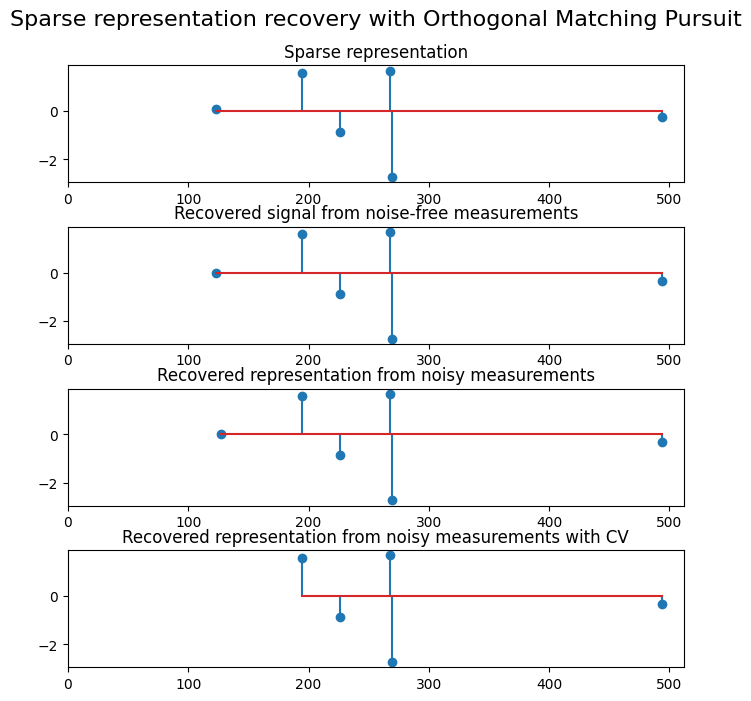

In [ ]:
# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, n_components)
plt.title("Sparse representation")
plt.stem(idx, w[idx])

# plot the noise-free reconstruction
plt.subplot(4, 1, 2)
plt.xlim(0, n_components)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r1, coef[idx_r1])

# plot the noisy reconstruction
plt.subplot(4, 1, 3)
plt.xlim(0, n_components)
plt.title("Recovered representation from noisy measurements")
plt.stem(idx_r2, coef[idx_r2])

# plot the noisy reconstruction with number of non-zeros set by CV
plt.subplot(4, 1, 4)
plt.xlim(0, n_components)
plt.title("Recovered representation from noisy measurements with CV")
plt.stem(idx_r3, coef[idx_r3])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse representation recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

### Question 7: choose n_nonzero_coefs = 6. What do you observe? Why?

#### Answer:

### Question 8: compute the mutual coherence of the dictionary.

#### Answer:

In [ ]:
# Code here

# Part 2: Circular convolution and its matrix form

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
from scipy.linalg import circulant
from scipy.fftpack import fft, ifft

from scipy import signal
import matplotlib.pyplot as plt

## The following function computes the circular convolution of two arrays

In [ ]:
def convcirc(sig,ker):
    '''
        sig: real 1D array
        ker: real 1D array
        sig and ker must have same shape
    '''
    c = ifft(fft(sig) * fft(ker)).real
    return c

### Question 1: verify by hand the result of the following circular convolution.

In [ ]:
kernel = [2, 1, 0, -1]; # kernel
sig = [1, 2, 3, 5]; # signal
c = convcirc(sig,kernel)
print(c)


[ 5.  2.  3. 12.]


## Comparison with the matrix form by using a circulant matrix

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.circulant.html

### Question 2: use the function "circulant" to get the appropriate circulant matrix D

#### Answer:

In [ ]:
# Code here

### Question 3: compute the circular convolution with an appropriate matrix multiplication

#### Answer:

In [ ]:
# Code here

### Question 4: generate a circulant matrix with the kernel given in the next cell. Print the matrix. What structure do you observe?

In [ ]:
kernel = [1, 2, 3, 0, 0, 0]; # kernel
# Fill in the cell

#### Answer:

In [ ]:
# Code here

## Illustration of a circular convolution with longer arrays

In [ ]:
sig = np.repeat([0., 1., 0.], 100)
ker = signal.windows.hann(20) # a Hann window

In [ ]:
print(ker)

[0.         0.02709138 0.10542975 0.22652592 0.37725726 0.54128967
 0.70084771 0.83864079 0.93973688 0.99318065 0.99318065 0.93973688
 0.83864079 0.70084771 0.54128967 0.37725726 0.22652592 0.10542975
 0.02709138 0.        ]


### Question 5: form "kerExt" by padding "ker" with zeros. The length of "kerExt" should be the length of "sig".

#### Answer:

In [ ]:
# Modify this cell
kerExt = 0*sig

In [ ]:
# Compute the circular convolution
filtered = convcirc(sig,kerExt)

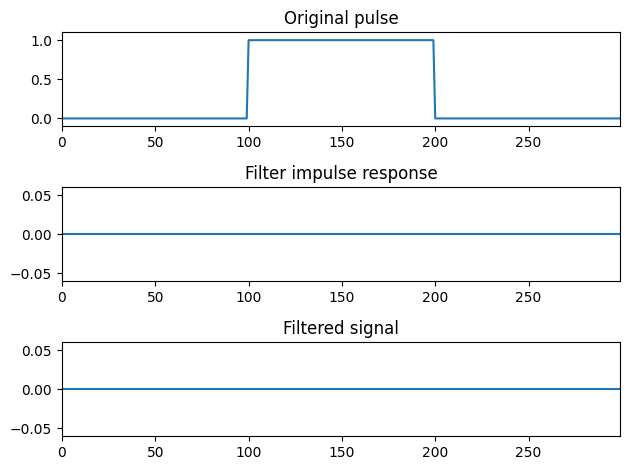

In [ ]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1)#, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(kerExt)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()

# Part 3: Sparsity within an autoencoder: Convolutional Autoencoder with Deconvolutions

We will train an autoencoder and check whether the internal representaton is sparse.

The convolutional autoencoder use convolutional layers that compress 784-pixel MNIST images down to a 1024 values internal representation without using pooling operations but increasing the stride in convolutional layers. The internal representation should be sparse.

This lab should run on GPU (the neural network training is ressource demanding!)


## Import libraries and MNIST dataset

In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

%matplotlib inline
import matplotlib.pyplot as plt

from torchvision import utils

##########################
### SETTINGS
##########################

#Completely reproducible results are not guaranteed across PyTorch releases, individual commits,
# or different platforms. Furthermore, results may not be reproducible between CPU and GPU executions,
# even when using identical seeds.
# See more details on https://pytorch.org/docs/stable/notes/randomness.html
# The following commands limit the randomness.

random_seed = 56534
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)

Device: cuda:0


In [ ]:
##########################
### MNIST DATASET
##########################

# Batch size
batch_size = 128

# Note transforms.ToTensor() scales input images to 0-1 range
# See details on https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data',
                              train=False,
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          drop_last=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False,
                         drop_last=True)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 64031885.63it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 88162804.82it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44939609.97it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4988355.27it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


## Deconvolution as a transposed convolution

**Transposed convolution**

Consider implementing the convolution by multiplying matrices.

Given an input vector $x$ and a weight matrix $W$ modeling the convolution, the forward propagation function of the convolution can be implemented by multiplying its input with the weight matrix and outputting a vector
$$
y=Wx,
$$
where $y\in \mathbb{R}^m$, $x\in \mathbb{R}^n$ and $W\in \mathbb{R}^{m\times n}$.

We compute a scalar loss $L$ at the end of the neural network (for example, $L={\|y-t\|}^2_2$ where $t$ is the known label vector). Let us assume that the (column) gradient $\nabla_y L$ is already computed during the backpropagation. We want to compute $\nabla_x L$.

A short calculation shows that
$$
\nabla_x L=W^T \nabla_y L.
$$

Hence, the backpropagation function of the convolution can be implemented by multiplying its input ($\nabla_y L$ in this example) with the transposed weight matrix $W^T$.

More details in https://d2l.ai/chapter_computer-vision/transposed-conv.html

The following code illustrated how nn.ConvTranspose2d is working. This is the standard Pytorch function that implements the transposed convolution in 2D.

In [ ]:
# Input
X = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
# Convolution kernel
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])

# since the signature of the function is torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size,...),
# we must reshape X and K
Xr, Kr = X.reshape(1, 1, 2, 2), K.reshape(1, 1, 2, 2)
tconv = torch.nn.ConvTranspose2d(1, 1, kernel_size=2, bias=False)
tconv.weight.data = Kr
Rr = tconv(Xr)
print(Rr)

tensor([[[[ 0.,  0.,  1.],
          [ 0.,  4.,  6.],
          [ 4., 12.,  9.]]]], grad_fn=<ConvolutionBackward0>)


The following picture explains how the trasnsposed convolution works in practice. The kernel pattern is weighted and plugged-in the output.

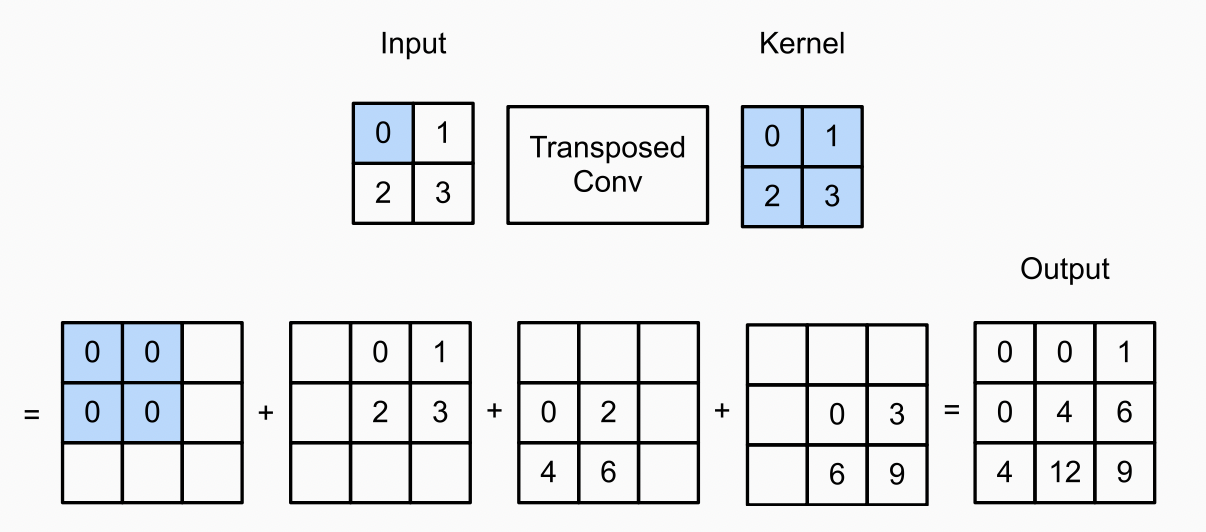

The following cell implements the transposed convolution as it is explained in the picture below. It is easy to check that the result is exactly what we expect.

In [ ]:
def trans_conv(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] + h - 1, X.shape[1] + w - 1))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Y[i: i + h, j: j + w] += X[i, j] * K
    return Y

R = trans_conv(X, K)
print(R)

tensor([[ 0.,  0.,  1.],
        [ 0.,  4.,  6.],
        [ 4., 12.,  9.]])


###Question: is the transposed convolution the inverse of a convolution?

**Answer**:



## Model

### Question 1: implement a convolutional autoencoder with 3 convolution layers and 3 deconvolution layers (i.e., transposed convolutions).

The three convolutions are:
- First convolution: kernel size (8,8), stride (2,2), no padding, number of output channels 128
- Second convolution: kernel size (8,8), stride (2,2), no padding, number of output channels 256
- Third convolution: kernel size (8,8), stride (2,2), no padding, number of output channels 1024

The deconvolutions must be consistent with the convolutions.

After each convolution and deconvolution, use a ReLU activation function, except the last deconvolution that is followed by a sigmoid (the output musy be in [0, 1] as the input).

We want to study the internal represensations of the autoencoder. Hence, the forward function of the convolutional autoencoder must return both the internal state (also called the code) after the 3 convolutions and the final output.

The autoencoder is illustrated in the figure below.

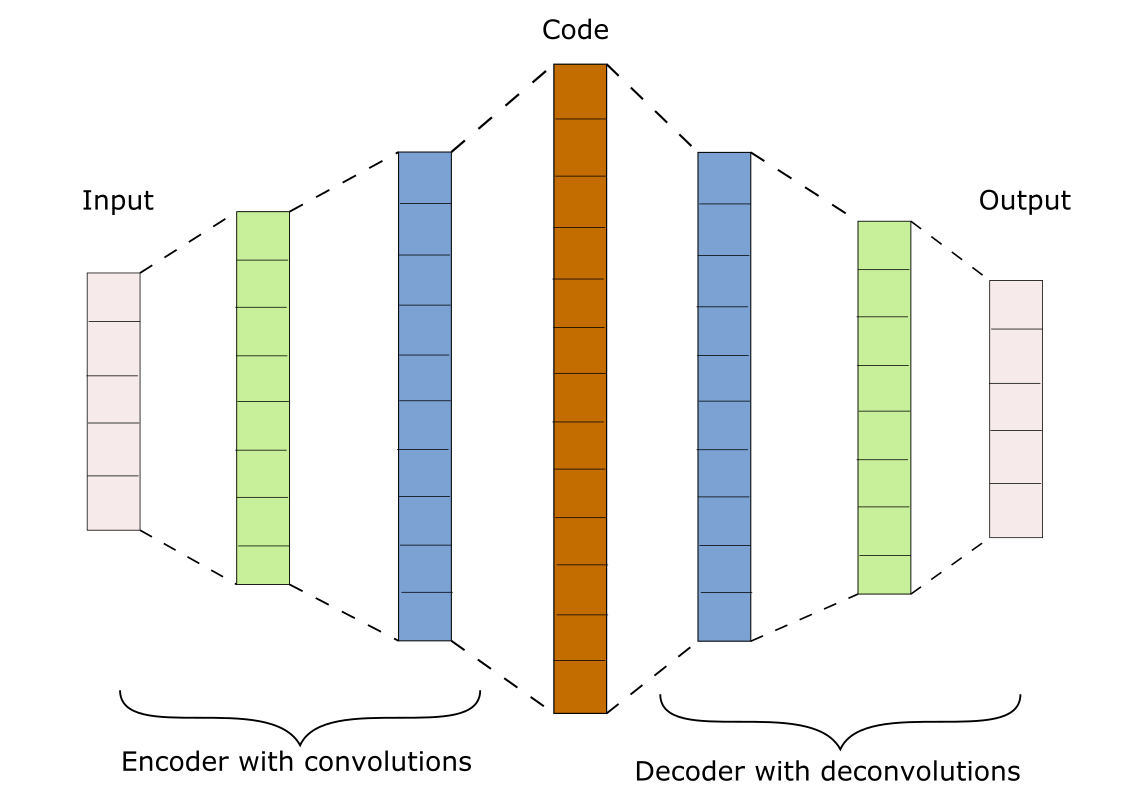

In [ ]:
##########################
### MODEL
##########################

class ConvolutionalAutoencoder(torch.nn.Module):

    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()

        # Dimensions of output after a convolution:
        # w: input size, k: kernel size, p: padding, s: stride
        # (w - k + 2*p)/s + 1 = o

        # Complete the code

    def forward(self, x):

        ### ENCODER
        # Complete the code

        ### DECODER
        # Complete the code

        return x, state


## Training

### Question 2: train the autoencoder with the Adam optimizer and the binary cross entropy as the loss.

In [ ]:
# Complete the code

## Evaluation

### Question 3: plot 10 input images and compare them to the reconstructed images returned by the autoencoder.




In [ ]:
# Code here

### Question 4: compute and get the internal states of an input data batch. Count the average number of non-zero elements within the internal state. Is the internal representation sparse?


In [ ]:
# Code Here